# TP3

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import sobel

### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

In [74]:
image_template = cv2.imread('TP3/template/pattern.png', cv2.IMREAD_GRAYSCALE)
# w, h = image_template.shape[::-1]

image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', cv2.IMREAD_GRAYSCALE)
print(image_1.shape)
image_2 =  cv2.imread('TP3/images/coca_logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_2.shape)
image_3 =  cv2.imread('TP3/images/coca_logo_2.png', cv2.IMREAD_GRAYSCALE)
print(image_3.shape)
image_4 =  cv2.imread('TP3/images/coca_multi.png', cv2.IMREAD_GRAYSCALE)
print(image_4.shape)
image_5 =  cv2.imread('TP3/images/coca_retro_1.png', cv2.IMREAD_GRAYSCALE)
print(image_5.shape)
image_6 =  cv2.imread('TP3/images/coca_retro_2.png', cv2.IMREAD_GRAYSCALE)
print(image_6.shape)
image_7 =  cv2.imread('TP3/images/logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_7.shape)


(1389, 1389)
(500, 207)
(363, 233)
(598, 799)
(493, 715)
(429, 715)
(450, 687)


In [57]:
def binarize_image(image):
    _, binary_image = cv2.threshold(image_template, 200, 255, cv2.THRESH_BINARY)
    return binary_image

In [247]:
class ImageTemplate:
    def __init__(self, template_path):
        self._template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        self._height, self._width = self._template.shape
        
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
    @property
    def image(self):
        return self._template
    
    def preprocess(self, x_scale, y_scale):
        # resize template
        result = cv2.resize(self._template, None, fx=x_scale, fy=y_scale)
        # Apply canny and return
        result = cv2.Canny(result, 15, 50, )
        # result = cv2.GaussianBlur(result, (5, 5), 0)
        # kernel = np.ones((3, 3), np.uint8)
        # result = cv2.dilate(result, kernel, iterations=1)
        return result
        # Detectar contornos
        # contours, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Crear una imagen vacía para rellenar los contornos
        # filled_image = np.zeros_like(result)

        # Rellenar los contornos cerrados con color blanco
        # cv2.drawContours(filled_image, contours, -1, (255), thickness=cv2.FILLED)
        # return filled_image

        

255

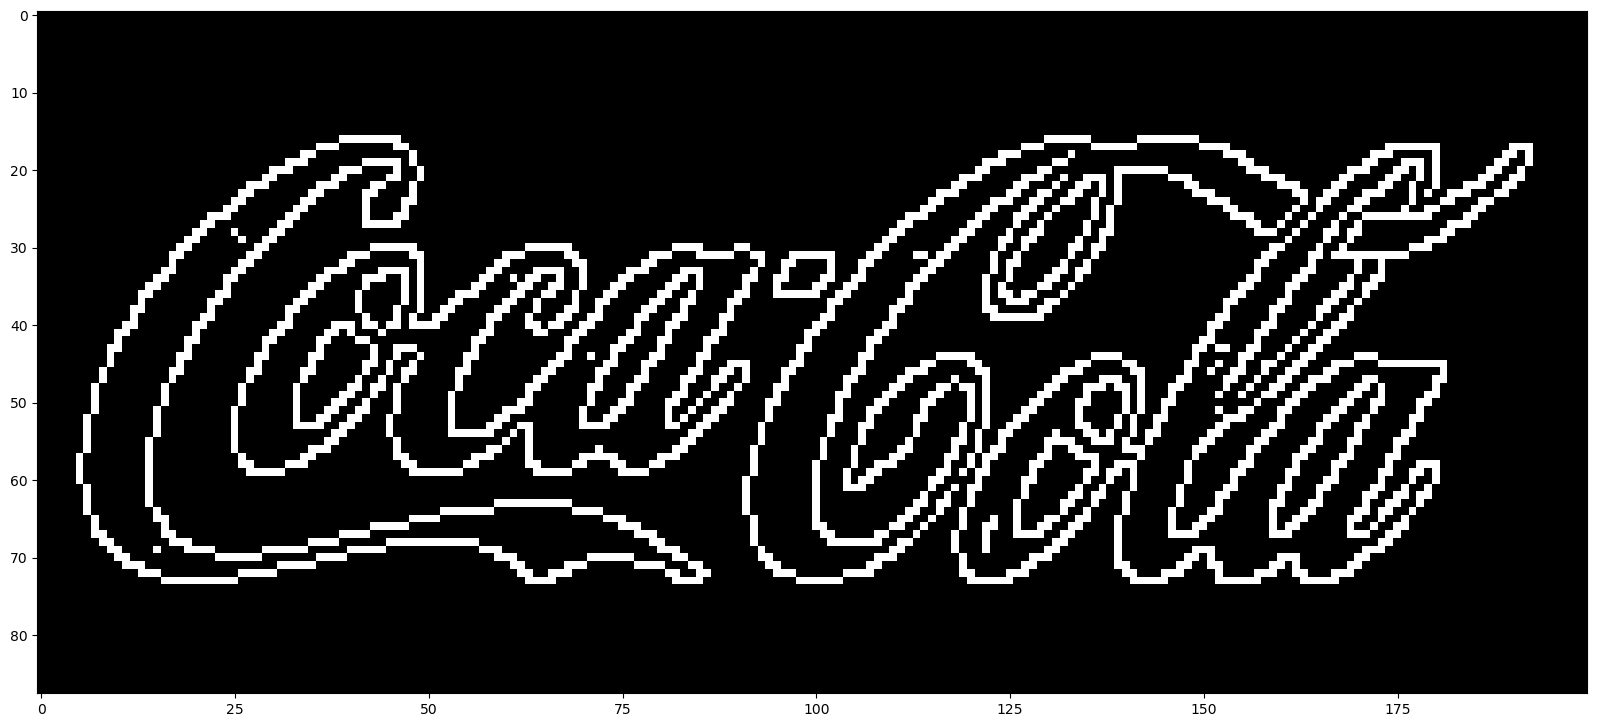

In [248]:
template_path = 'TP3/template/pattern.png'
template = ImageTemplate(template_path)
template_image = template.preprocess(0.3,0.3)
plt.figure(figsize=(20, 20))
plt.imshow(template.preprocess(0.5,0.5), cmap='gray')
np.max(template.preprocess(5,5))

In [206]:
def auto_canny(image, sigma=0.7):
    # Calcula la mediana de los píxeles de la imagen
    v = np.median(image)

    # Define los umbrales bajo y alto basados en la mediana
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))

    # Aplicar Canny con los umbrales calculados
    edges = cv2.Canny(image, lower, upper)
    return edges

def preprocess_image(image):
    result = cv2.GaussianBlur(image,(7,7),0)
    lower_percentile = np.percentile(image, 10)
    upper_percentile = np.percentile(image, 90)
    # result = cv2.Canny(image, lower_percentile, upper_percentile, apertureSize=3 ,L2gradient=True)
    # kernel = np.ones((3, 3), np.uint8)
    # result = cv2.dilate(result, kernel, iterations=1)
    result = auto_canny(result)
    return result    

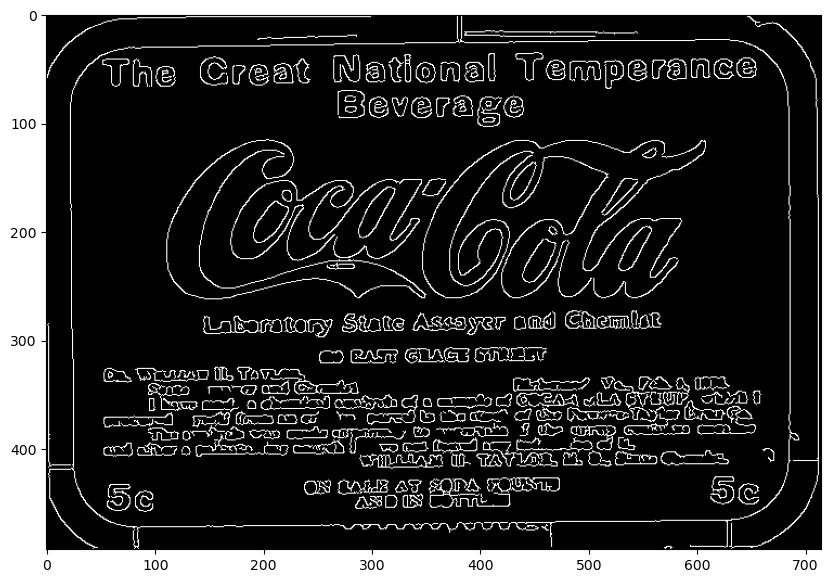

In [207]:
# Image preprocessing
image_1_binary = preprocess_image(image_5)
plt.figure(figsize=(10, 10))
plt.imshow(image_1_binary, cmap='gray')
# cv2.imshow("", image_1_binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', cv2.IMREAD_GRAYSCALE)
image_1_binary = preprocess_image(image_1)
kernel = np.ones((5,5), np.uint8)
image_1_binary = cv2.morphologyEx(image_1_binary, cv2.MORPH_CROSS, kernel)
# Aplicar el análisis de componentes conectados
num_labels, labels_im = cv2.connectedComponents(image_1_binary)

# Mostrar el número de componentes conectados
print(f"Número de componentes conectados: {num_labels}")

# Mostrar la imagen de etiquetas
cv2.imshow('Componentes conectados', labels_im.astype(np.uint8) * 255 // num_labels)
cv2.waitKey(0)
cv2.destroyAllWindows()

Número de componentes conectados: 21


In [108]:
print(image_3.shape)
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.10
start_point = (image_surface*proportion)/template_surface
print(start_point)

(363, 233)
2.7561728571428574


0.5035642857142857
(88, 201)
-0.08860815316438675 0.09621033817529678 (456, 42) (475, 314)


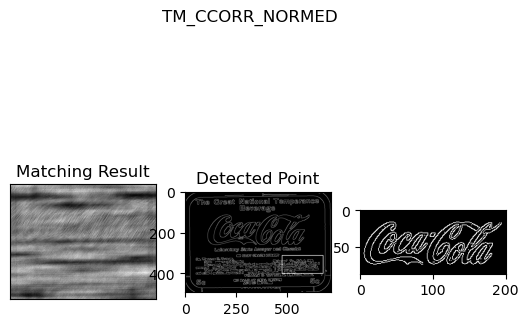

(106, 241)
-0.07134480029344559 0.08088289201259613 (428, 41) (151, 106)


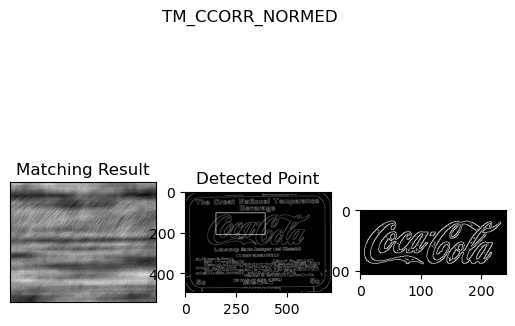

(123, 281)
-0.059057701379060745 0.07334745675325394 (431, 39) (17, 303)


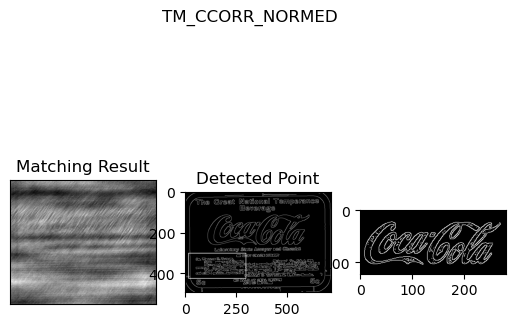

(140, 321)
-0.0507940948009491 0.06426141411066055 (76, 34) (363, 297)


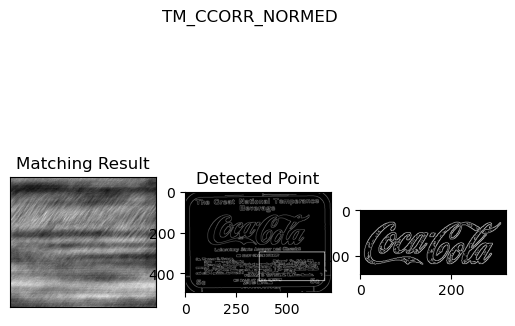

(158, 361)
-0.04288846254348755 0.058109868317842484 (219, 42) (214, 307)


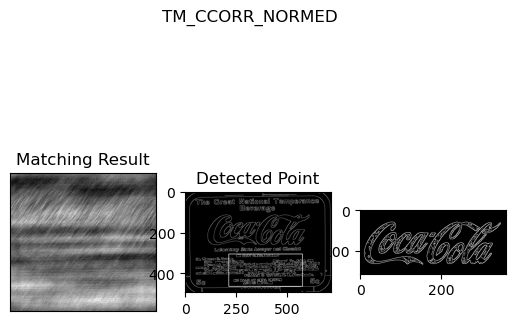

(175, 401)
-0.04163927957415581 0.05576688423752785 (223, 41) (204, 296)


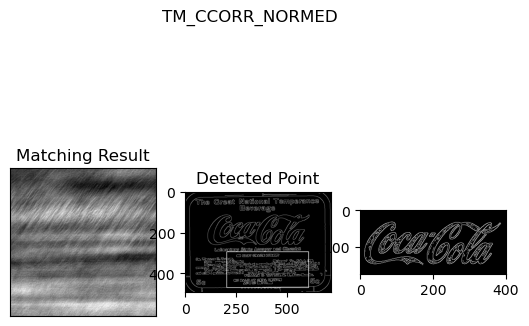

(193, 440)
-0.038047950714826584 0.055688343942165375 (220, 26) (170, 79)


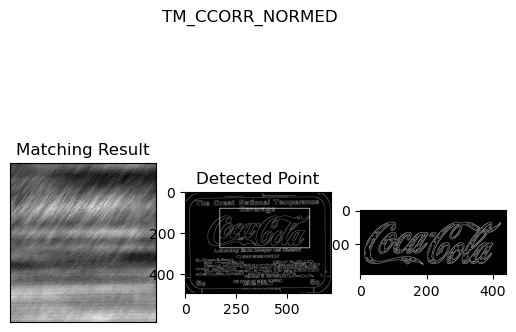

(210, 480)
-0.03473777696490288 0.046371836215257645 (176, 20) (120, 76)


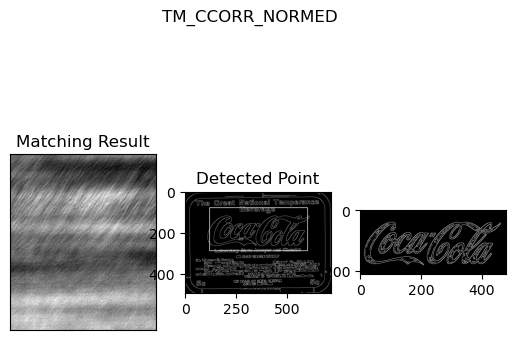

(228, 520)
-0.03089013323187828 0.06576258689165115 (191, 14) (102, 75)


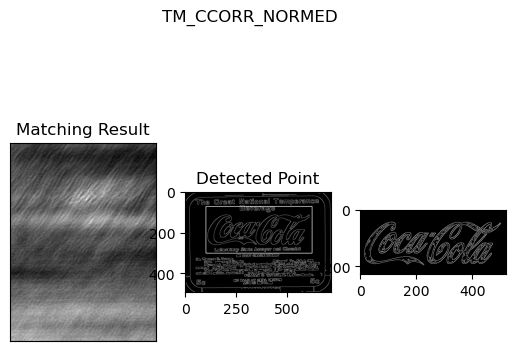

(245, 560)
-0.03089080937206745 0.05145760253071785 (152, 14) (73, 62)


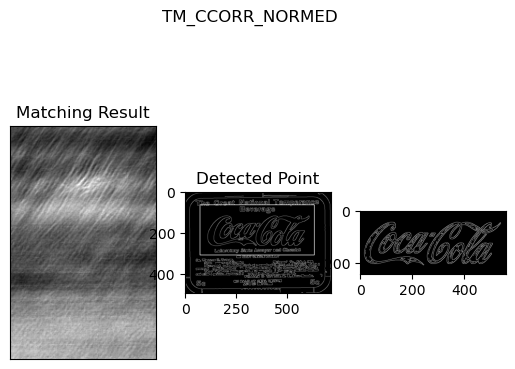

(262, 600)
-0.02066497877240181 0.042715784162282944 (112, 125) (50, 65)


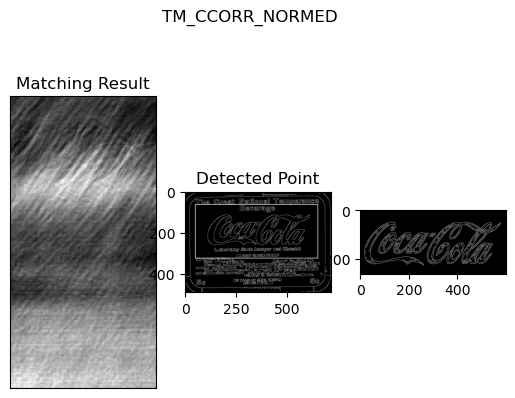

(280, 640)
-0.021717539057135582 0.0431261770427227 (75, 11) (26, 58)


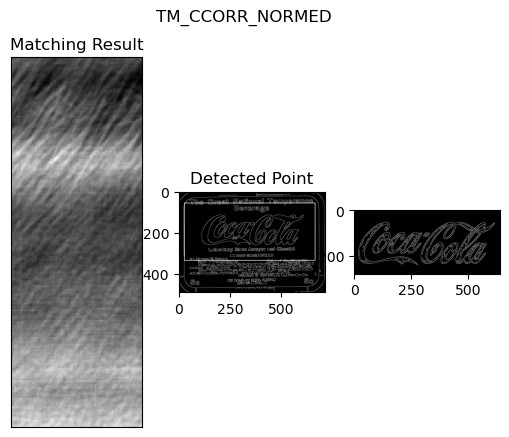

(297, 679)
-0.024668710306286812 0.03173277527093887 (24, 19) (6, 195)


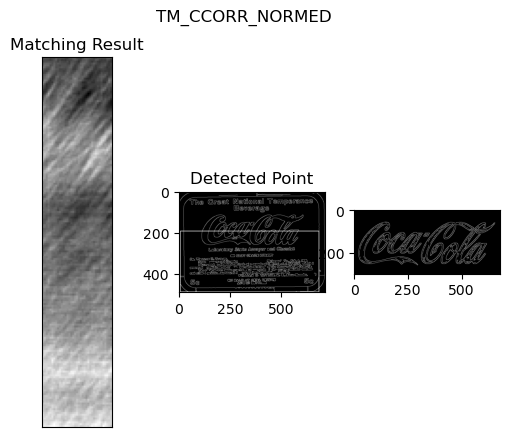

(315, 719)
Maximo valor 0.09621033817529678


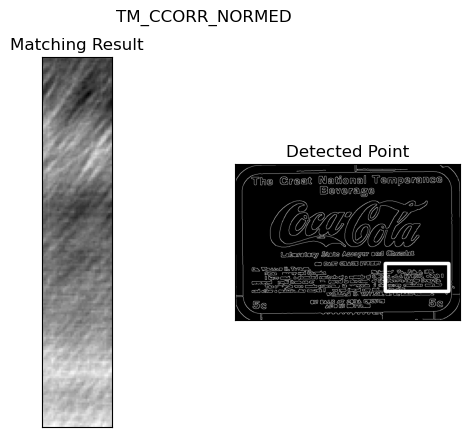

In [249]:
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
# scales = np.linspace(1, 20, 10) # image_1
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.1
start_point = (image_surface*proportion)/template_surface
print(start_point)
scales = np.linspace(start_point
                     , 100, 1000) # image_3
max_value = 0
img_max = None
for scale in scales:
    image_template_binary_resize = template.preprocess(x_scale=scale, y_scale=scale) #y_scale=1)
    print(image_template_binary_resize.shape)
    
    img = image_1_binary.copy()
    # method = getattr(cv2, meth)
 
    # Apply template Matching
    try:
        res = cv2.matchTemplate(img,image_template_binary_resize, cv2.TM_CCOEFF_NORMED)
    except Exception as e:
        break
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    #     top_left = min_loc
    # else:
    top_left = max_loc
    w, h = image_template_binary_resize.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(131),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), 
    plt.suptitle('TM_CCORR_NORMED')
    plt.subplot(133),plt.imshow(image_template_binary_resize,cmap = 'gray')
    plt.show()
 
    if max_val < 1 and max_val > max_value:
        img_max = img.copy()
        top_left_max = max_loc
        w, h = image_template_binary_resize.shape[::-1]
        bottom_right_max = (top_left_max[0] + w, top_left_max[1] + h)
        max_value = max_val
 
print("Maximo valor {max_value}".format(max_value=max_value))
cv2.rectangle(img_max,top_left_max, bottom_right_max, 255, 10)
 
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_max,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCORR_NORMED')
plt.show()

In [14]:
# Crear el detector ORB
orb = cv2.ORB_create()
image = image_1_binary
logo = template_image

# Detectar puntos clave y descriptores en ambas imágenes
keypoints1, descriptors1 = orb.detectAndCompute(image, None)
keypoints2, descriptors2 = orb.detectAndCompute(logo, None)

# Utilizar un matcher de características
bf = cv2.BFMatcher(0, crossCheck=True)

# Emparejar las características
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Dibujar las coincidencias
result_image = cv2.drawMatches(image, keypoints1, logo, keypoints2, matches[:10], None, flags=2)

# Mostrar las coincidencias
cv2.imshow('ORB Coincidencias', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/core/src/batch_distance.cpp:380: error: (-210:Unsupported format or combination of formats) The combination of type=0, dtype=5 and normType=0 is not supported in function 'batchDistance'


In [7]:
] # Crear el detector ORB
orb = cv2.ORB_create()

# Detectar y computar características clave y descriptores
keypoints_logo, descriptors_logo = orb.detectAndCompute(template_image, None)
keypoints_image, descriptors_image = orb.detectAndCompute(image_2, None)

In [8]:
# Usar el matcher BruteForce-Hamming (adecuado para ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar las coincidencias
matches = bf.match(descriptors_logo, descriptors_image)

# Ordenar las coincidencias por distancia
matches = sorted(matches, key=lambda x: x.distance)

# Dibujar las mejores coincidencias
result = cv2.drawMatches(template_image, keypoints_logo, image_2, keypoints_image, matches[:20], None, flags=2)

# Mostrar el resultado
cv2.imshow("Coincidencias", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# Extraer los puntos clave correspondientes
src_pts = np.float32([keypoints_logo[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_image[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Calcular la homografía
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Obtener las dimensiones del logo
h, w = template_image.shape

# Definir las esquinas del logo
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

# Transformar las esquinas según la homografía
dst = cv2.perspectiveTransform(pts, M)

# Dibujar las esquinas del logo detectado en la imagen
image = cv2.polylines(image_2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# Mostrar el resultado final
cv2.imshow("Logo detectado", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:

# Convertir a escala de grises (opcional, pero suele mejorar el rendimiento)
gray_image = image_5.copy()
gray_template = template_image.copy()

# Obtener dimensiones del template
template_height, template_width = gray_template.shape[:2]

# Variables para guardar los mejores resultados
best_match = None
best_value = -1  # Inicializar con un valor bajo para comparar
best_scale = 1
best_position = (0, 0)

# Probar diferentes escalas de la imagen
for scale in np.linspace(0.5, 1.5, 20):  # Escalar de 50% a 150%
    resized_template = cv2.resize(gray_template, (int(template_width * scale), int(template_height * scale)))

    # Evitar que el template sea más grande que la imagen
    if resized_template.shape[0] > gray_image.shape[0] or resized_template.shape[1] > gray_image.shape[1]:
        continue

    # Aplicar el template matching
    result = cv2.matchTemplate(gray_image, resized_template, cv2.TM_CCOEFF_NORMED)

    # Obtener el valor máximo de coincidencia y su ubicación
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Guardar la mejor coincidencia
    if max_val > best_value:
        best_value = max_val
        best_match = resized_template
        best_position = max_loc
        best_scale = scale

# Dibujar un rectángulo alrededor del logo detectado
top_left = best_position
bottom_right = (top_left[0] + int(template_width * best_scale), top_left[1] + int(template_height * best_scale))
cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Mostrar el resultado
cv2.imshow('Logo detectado', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
image_1_down = cv2.pyrDown(image_1)
image_1_2down = cv2.pyrDown(image_1_down)
image_1_up = cv2.pyrUp(image_1)
image_1_2up = cv2.pyrUp(image_1_up)
cv2.imshow('Logo detectado', image_1_up)
cv2.waitKey(0)
cv2.destroyAllWindows()